## IHDP

In [ ]:
!pip install econml

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score # to split the data into train and test datasets 
from sklearn.preprocessing import StandardScaler # use of StandardScaler to standarise the dataset
import numpy as np # library of mathematical operations
import pandas as pd  # for data anlysis and manipulation
import matplotlib.pyplot as plt # to display charts
import seaborn as sns # data visualisation library
from econml.metalearners import XLearner
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

### Loading the dataset

In [2]:
ihdp = pd.read_csv("https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.csv", delimiter=",")
ihdp

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-1.853672,-2.201766,1.500917,0.161703,-0.129052,-1.023402,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.244050,5.269701,4.598246
743,-1.066845,-1.402238,1.128554,2.244320,0.371086,2.288910,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.253175,8.393338,0.940855
744,-1.045229,-1.337276,1.128554,-0.879606,0.683672,0.301522,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.908235,6.897207,4.373736
745,-0.115735,-0.602710,-1.105624,2.244320,0.558638,2.785756,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.324520,9.208251,0.352653


### Exploring the dataset

In [ ]:
ihdp.info()

In [ ]:
nrow, ncol = ihdp.shape
print(f'There are {nrow} rows and {ncol} columns')

In [43]:
X = ihdp[["x1", 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
         'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 
         'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25' ]].copy()

In [ ]:
# reshaping the single dimension vectors into 2D vectors as some methods prefer this representaion of data
T = ihdp['t'].values.reshape(-1, 1)
Y = ihdp['yf'].values.reshape(-1, 1)
ite = ihdp['ite']

In [ ]:
# to plot a boxplot of each feature in the dataset and check if the features vary in scale
plt.figure(figsize=(30,15))
sns.boxplot(data = X)

In [ ]:
plt.savefig("ihdp_boxplot.pdf")

In [ ]:
# to draw histogram and look at the distribution of values of each feature
ihdp.hist(bins=50, figsize=(20,20))

In [ ]:
plt.savefig("ihdp_histogram.pdf")

In [ ]:
# to plot scatterplot across all the features
sns.pairplot(X)

In [ ]:
plt.savefig("ihdp_scatterplot.pdf")

In [ ]:
# to calculate the correlations between each pair of variables
cor = X.corr()

# to plot a heatmap of the correlations between pairs of features
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(cor, annot = True)

In [ ]:
plt.savefig("ihdp_heatmap.pdf")

### Data pre-processing

In [3]:
# to split the data into train and test datasets
train_set, test_set = train_test_split(ihdp, test_size=0.2, random_state=50)  
print(len(train_set), len(test_set))

597 150


In [4]:
x_train = train_set[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
         'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 
         'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25']].copy()
x_test = test_set[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
         'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 
         'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25']].copy()

In [5]:
y_train = train_set['yf'].copy()
y_test = test_set['yf'].copy()

In [6]:
t_train = train_set['t'].copy()
t_test = test_set['t'].copy()

In [7]:
ite_train = train_set['ite'].copy()
ite_test = test_set['ite'].copy()

In [8]:
scaler_x = StandardScaler() # to standarise the dataset i.e. mean = 0 and s.d. = 1
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [9]:
x_train = pd.DataFrame(x_train)
t_train = pd.DataFrame(t_train)

In [24]:
x_test = pd.DataFrame(x_test)
t_test = pd.DataFrame(t_test)

### Modelling

## 3

In [10]:
clf = RandomForestRegressor()

In [11]:
scores = cross_val_score(clf, x_train, y_train, cv=10, scoring = "neg_mean_squared_error")
print("Negative mean squared error: %.2f +/- %.2f" % (scores.mean(), scores.std()))

Negative mean squared error: -3.53 +/- 0.90


In [98]:
param_grid = { 
    'n_estimators': [25,50,100,150],
    'max_depth' : [3,4,5,6,7,8],
}

In [13]:
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
CV_clf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(max_depth=3),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [25, 50, 100, 150]})

In [14]:
CV_clf.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [16]:
simple_reg = RandomForestRegressor(n_estimators = 100, max_depth = 6)

In [18]:
# Train on the training data.
# In the supervised setting, our usual X here consists of X and T.
# The target is Y - the outcome.
# Input: [X, T], output: Y.
# Hint: use np.concatenate or np.hstack functions to merge X and T.

xt_train = np.concatenate([x_train, t_train], axis=1)
simple_reg.fit(xt_train, y_train)

RandomForestRegressor(max_depth=6)

In [19]:
scores = cross_val_score(simple_reg, xt_train, y_train, cv = 10, scoring = "neg_mean_squared_error")
print("Negative mean squared error: %.2f +/- %.2f" % (scores.mean(), scores.std()))

Negative mean squared error: -1.18 +/- 0.24


In [ ]:
# Predictions
# Note we set T to a specific value for ALL individuals.
# These are interventional distributions - P(Y|X, do(T=t)).


In [26]:
# Predict Y_0 given [X, 0]
# Hint: use np.zeros_like or np.zeros functions to get the zeros for all units.
# Hint 2: you still have to merge X and zeros (see training above).
xt0_test = np.concatenate([x_test, np.zeros_like(t_test)], axis=1)
simple_reg_y0_test = simple_reg.predict(xt0_test)

In [27]:
# Predict Y_1 given [X, 1]
# Hint: use np.ones_like or np.ones functions to get the ones for all units.
# Hint 2: you still have to merge X and ones (see training above).
xt1_test = np.concatenate([x_test, np.ones_like(t_test)], axis=1)
simple_reg_y1_test = simple_reg.predict(xt1_test)

In [130]:
# Compute ITEs
# ITE = Y_1 - Y_0
simple_reg_te_test = simple_reg_y1_test - simple_reg_y0_test

In [131]:
def pehe(effect_true, effect_pred):
    return np.sqrt(np.mean((effect_pred - effect_true)**2))

In [132]:
# Error on ATE
# Use our 'abs_ate' function, true ITEs and predicted ITEs to get the measurements.
# ate_test = abs_ate(ite_test, simple_reg_te_test)

# PEHE
# Use our 'pehe' function, true ITEs and predicted ITEs to get the measurements.
pehe_test = pehe(ite_test, simple_reg_te_test)

In [134]:
results = []
results.append(['Simple Learner', pehe_test])

cols = ['Method', 'PEHE test']

df = pd.DataFrame(results, columns=cols)
df

,Method,PEHE test
0,Simple Learner,0.517824


In [34]:
# Let's see the feature importances for our classifier
importances = simple_reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in simple_reg.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Let's get the attibute names:
feat_names = x_train.columns

[25  5 14  0  3  4  2  1 11 12 23  6 24  8 10 13  7 16 17 15 20 19  9 18
 21 22]


In [38]:
# Print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, feat_names[indices[f]],  importances[indices[f]]))

Feature ranking:


IndexError: index 25 is out of bounds for axis 0 with size 25

ValueError: shape mismatch: objects cannot be broadcast to a single shape

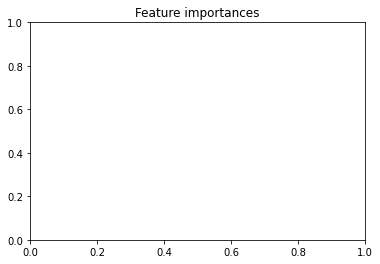

In [45]:
# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feat_names)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

## 4

In [49]:
def get_ps_weights(clf, x, t):
  ti = np.squeeze(t)
  clf.fit(x, ti)
  ptx = clf.predict_proba(x).T[1].T + 0.0001 # add a small value to avoid dividing by 0
  wi = ti/ptx + 1 - ti/ 1 - ptx
  return wi

In [86]:
prop_clf = RandomForestClassifier()
scores = cross_val_score(prop_clf, x_train, t_train['t'], cv=10, scoring = "accuracy")
print("accuracy score: %.2f" % (scores.mean()))

accuracy score: 0.81


In [88]:
CV1_model = GridSearchCV(estimator=prop_clf, param_grid=param_grid, cv= 10)
CV1_model.fit(x_train, t_train['t'])

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'n_estimators': [25, 50, 100, 150]})

In [89]:
CV1_model.best_params_

{'max_depth': 4, 'n_estimators': 25}

In [92]:
prop = RandomForestClassifier(n_estimators = 25, max_depth = 4)
scores = cross_val_score(prop, x_train, t_train['t'], cv=10, scoring = "accuracy")
print("accuracy score: %.2f" % (scores.mean()))

accuracy score: 0.82


In [93]:
# to get the sample weights
weights = get_ps_weights(prop, x_train, t_train)

In [95]:
model = RandomForestRegressor()
scores = cross_val_score(model, x_train, y_train, cv=10, scoring = "neg_mean_squared_error")
print("Negative mean squared error: %.2f +/- %.2f" % (scores.mean(), scores.std()))

Negative mean squared error: -3.54 +/- 0.82


In [108]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150, 200],
    'max_depth' : [4, 5, 6, 7, 8, 9, 10, 11, 12],
}

In [109]:
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv= 10)
CV_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'n_estimators': [25, 50, 100, 150, 200]})

In [110]:
CV_model.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [119]:
# to train the regressor
ipsw = RandomForestRegressor(n_estimators = 50, max_depth = 5)
ipsw.fit(xt_train, y_train, sample_weight= weights)

RandomForestRegressor(max_depth=5, n_estimators=50)

In [120]:
scores = cross_val_score(ipsw, x_train, y_train, cv=10, scoring = "neg_mean_squared_error")
print("Negative mean squared error: %.2f +/- %.2f" % (scores.mean(), scores.std()))

Negative mean squared error: -3.50 +/- 0.86


In [121]:
# Make predictions
ipsw_y0_test = ipsw.predict(np.concatenate([x_test, np.zeros_like(t_test)], axis=1))
ipsw_y1_test = ipsw.predict(np.concatenate([x_test, np.ones_like(t_test)], axis=1))

In [122]:
# Compute ITEs
ipsw_te_test = ipsw_y1_test - ipsw_y0_test

In [151]:
# Error on ATE
# Use our 'abs_ate' function, true ITEs and predicted ITEs to get the measurements.
# rf_ipsw_ate_test = abs_ate(ite_test, ipsw_te_test)

# PEHE
# Use our 'pehe' function, true ITEs and predicted ITEs to get the measurements.
ipsw_pehe_test = pehe(ite_test, ipsw_te_test)

In [152]:
results = []
results.append(['IPSW', ipsw_pehe_test])

cols = ['Method', 'PEHE test']

df = pd.DataFrame(results, columns=cols)
df

,Method,PEHE test
0,IPSW,0.444116


In [137]:
# Let's see the feature importances for our classifier
importances = ipsw.feature_importances_
std = np.std([tree.feature_importances_ for tree in ipsw.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Let's get the attibute names:
feat_names = x_train.columns

[25  5  0 14  3  4  1  2 10 12  7  8 11 24 23 13  6 18 20 15 16 21 19 17
  9 22]


## 5

In [138]:
first_stage = lambda: GridSearchCV(
                estimator=RandomForestRegressor(),
                param_grid={
                        'max_depth': [3, 4, 5, 6, 7],
                        'n_estimators': (50, 100, 150, 200)
                    }, cv=10, n_jobs=-1, scoring='neg_mean_squared_error'
                )
mod_y = first_stage().fit(x_train, y_train).best_estimator_

In [140]:
first_stage0 = lambda: GridSearchCV(
                estimator=RandomForestClassifier(),
                param_grid={
                        'max_depth': [3, 4, 5, 6, 7],
                        'n_estimators': (50, 100, 150, 200)
                    }, cv=10, n_jobs=-1, scoring='accuracy'
                )
mod_y0 = first_stage0().fit(x_train, t_train['t']).best_estimator_

In [141]:
# Instantiate X learner
X_learner = XLearner(models=mod_y, propensity_model=mod_y0)

In [144]:
# Train X_learner
X_learner.fit(y_train, t_train['t'], X=x_train)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [145]:
# Estimate treatment effects on test data
x_estimate = X_learner.effect(x_test)

In [147]:
# Use our 'abs_ate' function, true ITEs and predicted ITEs to get the measurements.
# xl_ate_test = abs_ate(ite_test,x_estimate)

# Use our 'pehe' function, true ITEs and predicted ITEs to get the measurements.
xl_pehe_test = pehe(ite_test,x_estimate)

In [148]:
results = []
results.append(['XL', xl_pehe_test])

col = ['Method', 'PEHE test']

df = pd.DataFrame(results, columns=col)
df

,Method,PEHE test
0,XL,0.347112


In [153]:
results = []
results.append(['Simple Learner', pehe_test])
results.append(['IPW', ipsw_pehe_test])
results.append(['XL', xl_pehe_test])

cols = ['Method', 'PEHE test']

df = pd.DataFrame(results, columns=cols)
df

,Method,PEHE test
0,Simple Learner,0.517824
1,IPW,0.444116
2,XL,0.347112
